# Project Outline

## Project Objectives:

The objective of this project is to develop a machine learning model to predict machine failure using sensor data and operational conditions. This model aims to identify early indicators of potential failures, helping organizations implement preventive maintenance strategies. By accurately predicting failures, the project seeks to minimize downtime, improve operational efficiency, and reduce maintenance costs.

## Business Significance of the Use Case:

Predicting machine failures is critical for industries relying on continuous production. Unplanned downtime due to machine failures can result in significant financial losses, decreased productivity, and potential safety hazards. A predictive maintenance system enables timely interventions, reducing repair costs and enhancing asset utilization. This use case supports operational excellence, cost optimization, and improved decision-making for maintenance planning.

## Dataset Understanding

### Column Names and Their Significance

    1. Unique ID: Identifier for each observation (not used for analysis).
    2. Product ID: Identifier for the product being manufactured (may have a relationship with failure patterns).
    3. Quality: Categorical variable representing the quality grade of the product.
    4. Ambient T (C): Sensor measurement of ambient temperature (may influence machine performance).
    5. Process T (C): Process temperature measured during operation (indicator of operational stress).
    6. Rotation Speed (rpm): Rotational speed of the machine (may indicate wear and tear).
    7. Torque (Nm): Torque applied to the machine (a measure of load).
    8. Tool Wear (min): Cumulative tool wear time in minutes (higher values may indicate aging tools).
    9. Machine Status: Target variable indicating machine failure (0: No Failure, 1: Failure).

### Predictor Variables (Features) and Target Variable

#### Predictor Variables:
- Ambient T (C)
- Process T (C)
- Rotation Speed (rpm)
- Torque (Nm)
- Tool Wear (min)
- Quality (categorical, one-hot encoding may be needed).

#### Target Variable:

- Machine Status (binary classification: 0 or 1).

## Methodology

This project involves building a classification model, as the target variable (Machine Status) is binary (indicating whether the machine has failed or not). The methodology involves the following steps:

- Data Preprocessing: Cleaning and imputing missing values, removing irrelevant features, and scaling numerical data.
- Exploratory Data Analysis (EDA): Understanding feature distributions, relationships, and their impact on failures.
- Feature Engineering: Creating additional features, encoding categorical variables, and selecting relevant predictors.
- Model Building: Using classification algorithms (e.g., Logistic Regression, Decision Tree, SVM, Random Forest, KNN, Naive Bayes) to predict machine status.
- Model Evaluation: Assessing performance using metrics like accuracy, precision, recall and F1-score.
- Model Deployment: Providing actionable insights and integrating predictions into a maintenance planning system.

# Predictive Maintenance: Machine Failure Prediction with Data-Driven Insights

## Importing Libraries

In [1]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt
import  seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
machine_data = pd.read_csv('Project-9-MAchine Failure predictions.csv')
machine_data.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


## Basic Data Analysis

### First Five Rows

In [4]:
machine_data.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


### Last 5 Rows

In [5]:
machine_data.tail()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0
19999,20000,Z10048,M,25.95,35.65,1500.0,40.2,30,0


### Total Number of Rows and Columns in dataset

In [6]:
machine_data.shape

(20000, 9)

In [7]:
print(f'Number of Rows in datasets = {machine_data.shape[0]}')
print(f'Number of Columns in datasets = {machine_data.shape[1]}')

Number of Rows in datasets = 20000
Number of Columns in datasets = 9


### List of columns

In [8]:
machine_data.columns

Index(['Unique ID', 'Product ID', 'Quality', 'Ambient T (C)', 'Process T (C)',
       'Rotation Speed (rpm)', 'Torque (Nm)', 'Tool Wear (min)',
       'Machine Status'],
      dtype='object')

### Information about the data 

In [9]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


## Data Cleaning and Transformation

### Checking and removing duplicates

In [10]:
machine_data.duplicated().any()

False

There are no duplicates in the dataset

### Checking Null Values

In [11]:
machine_data.isna().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

The dataset has some missing values in the columns:
- Quality
- Process T (C) and
- Rotation Speed (rpm).

**Calculating % Null Values**

In [12]:
null_count = machine_data.isna().sum().reset_index()
null_count.columns = ['Column_Name', 'Null_Values']
null_count['% Null'] = round(null_count['Null_Values']/(machine_data.shape[0])*100,1)
null_count

,Column_Name,Null_Values,% Null
0,Unique ID,0,0.0
1,Product ID,0,0.0
2,Quality,991,5.0
3,Ambient T (C),0,0.0
4,Process T (C),400,2.0
5,Rotation Speed (rpm),1188,5.9
6,Torque (Nm),0,0.0
7,Tool Wear (min),0,0.0
8,Machine Status,0,0.0


**Imputing Null Values**

In [13]:
quality_mode = machine_data['Quality'].mode()[0]
print(quality_mode)

L


In [14]:
machine_data['Quality'] = machine_data['Quality'].fillna(quality_mode)

In [15]:
process_temp_mean = round(machine_data['Process T (C)'].mean(),2)
print(process_temp_mean)

36.9


In [16]:
machine_data['Process T (C)'] = machine_data['Process T (C)'].fillna(process_temp_mean)

In [17]:
rpm_mean = round(machine_data['Rotation Speed (rpm)'].mean(),2)
print(rpm_mean)

1538.8


In [18]:
machine_data['Rotation Speed (rpm)'] = machine_data['Rotation Speed (rpm)'].fillna(rpm_mean)

In [19]:
machine_data.isna().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

### Renaming the columns

In [20]:
machine_data.rename(columns={
    'Ambient T (C)': 'Ambient_temp',
    'Process T (C)': 'Process_temp',
    'Rotation Speed (rpm)': 'Rotation_speed',
    'Torque (Nm)': 'Torque',
    'Tool Wear (min)': 'Tool_wear',
    'Machine Status': 'Machine_status'
}, inplace=True)

### Deleting unwanted columns

In [21]:
machine_data.drop(columns=['Unique ID','Product ID'],axis=1,inplace=True)

In [22]:
machine_data.head()

,Quality,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status
0,M,24.95,35.45,1551.0,42.8,0,0
1,L,25.05,35.55,1408.0,46.3,3,0
2,L,24.95,35.35,1498.0,49.4,5,0
3,L,25.05,35.45,1433.0,39.5,7,0
4,L,25.05,35.55,1408.0,40.0,9,0


## Exploratory Data Analysis (EDA) 

### Statistics

#### Basic Statistics of Numeric Features (mean, median, max, min, etc…) 

In [23]:
machine_data.describe()

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,26.904930,36.904205,1538.795670,39.986910,107.951000,0.033900
std,2.000834,1.468735,173.286808,9.968684,63.652555,0.180976
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,25.250000,35.750000,1429.000000,33.200000,53.000000,0.000000
50%,26.950000,36.950000,1514.000000,40.100000,108.000000,0.000000
75%,28.450000,37.950000,1604.000000,46.800000,162.000000,0.000000
max,31.450000,40.750000,2886.000000,76.600000,253.000000,1.000000


#### Basic Statistics of Categorical Columns

In [24]:
machine_data.describe(include='object')

,Quality
count,20000
unique,3
top,L
freq,12381


#### Unique values in categorical features 

In [25]:
machine_data['Quality'].unique()

array(['M', 'L', 'H'], dtype=object)

#### Correlation matrix

In [26]:
num_col = ["Ambient_temp", "Process_temp", "Rotation_speed","Torque","Tool_wear"]

In [27]:
corr_data = machine_data[num_col].corr()
corr_data

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear
Ambient_temp,1.000000,0.866878,0.023910,-0.013774,0.013849
Process_temp,0.866878,1.000000,0.019312,-0.012728,0.013743
Rotation_speed,0.023910,0.019312,1.000000,-0.848619,0.003050
Torque,-0.013774,-0.012728,-0.848619,1.000000,-0.003093
Tool_wear,0.013849,0.013743,0.003050,-0.003093,1.000000


### Data Visualization

#### Histogram

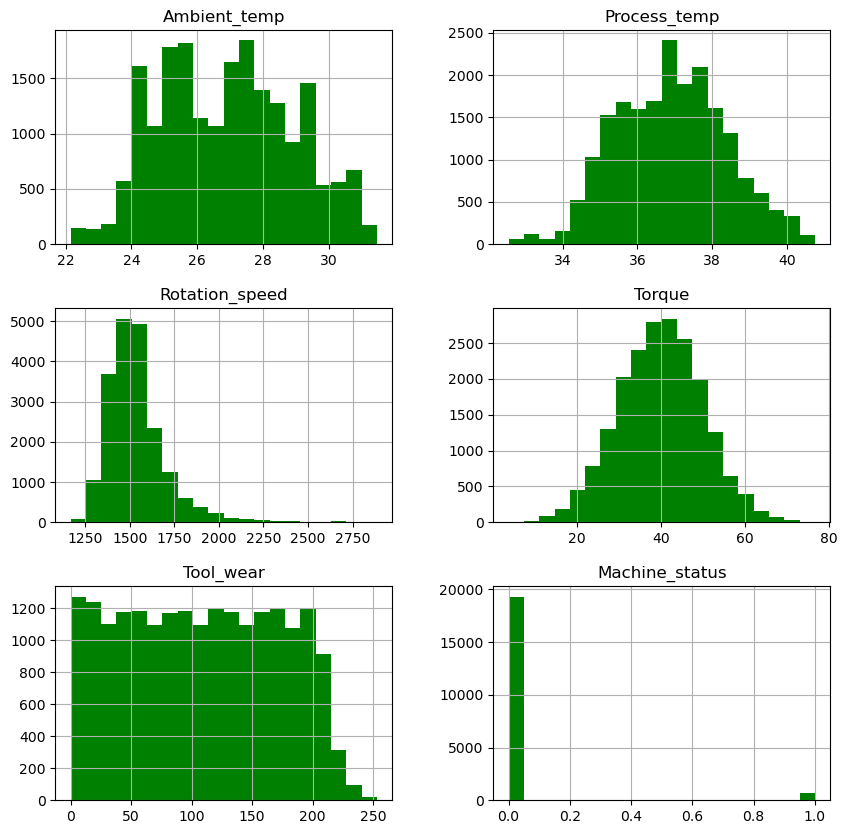

In [28]:
machine_data.hist(figsize=(10,10), color = 'green', bins=20)
plt.show()

#### Box Plot

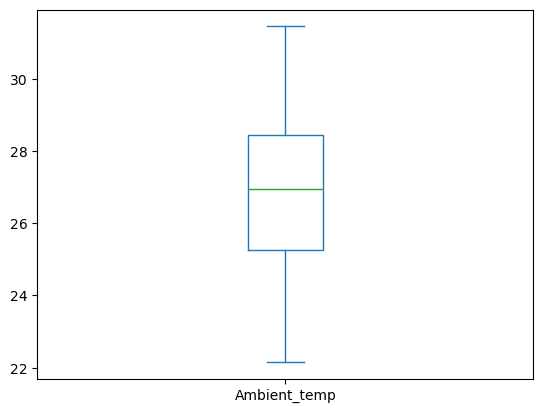

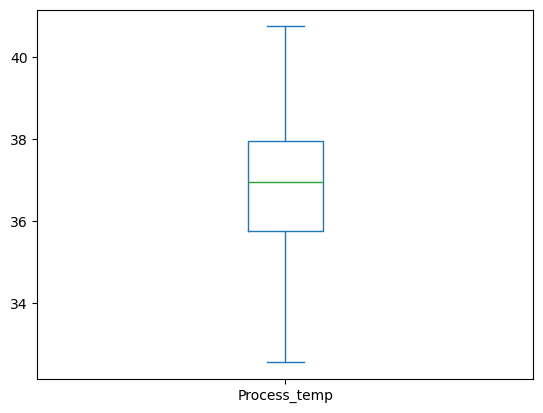

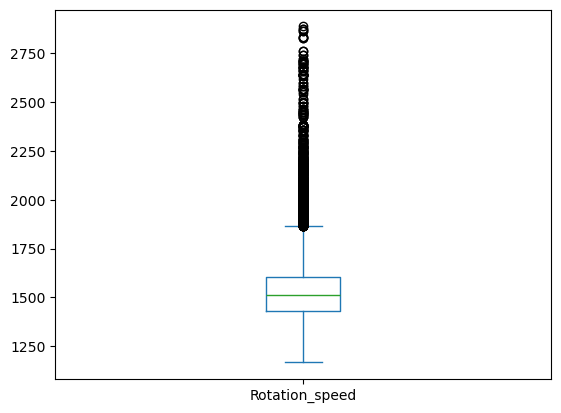

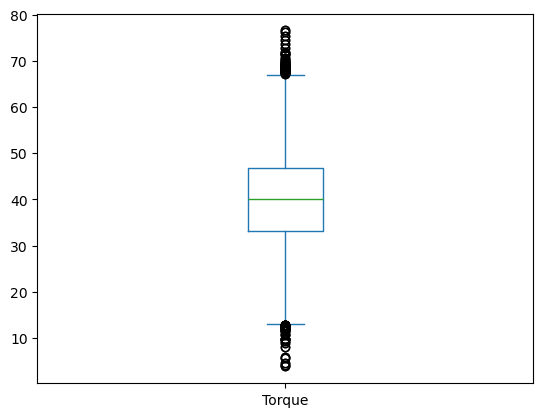

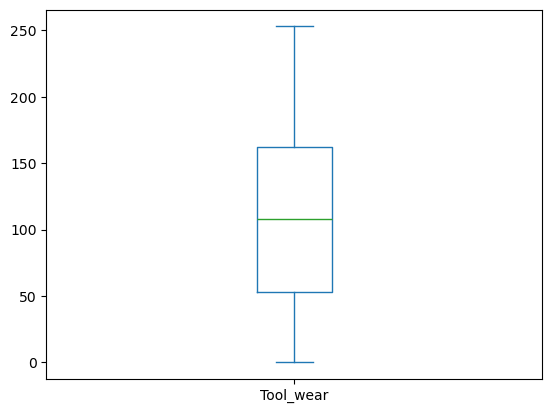

In [29]:
for col in num_col:
    machine_data[col].plot(kind = 'box')
    plt.show()

#### Scatter Plot

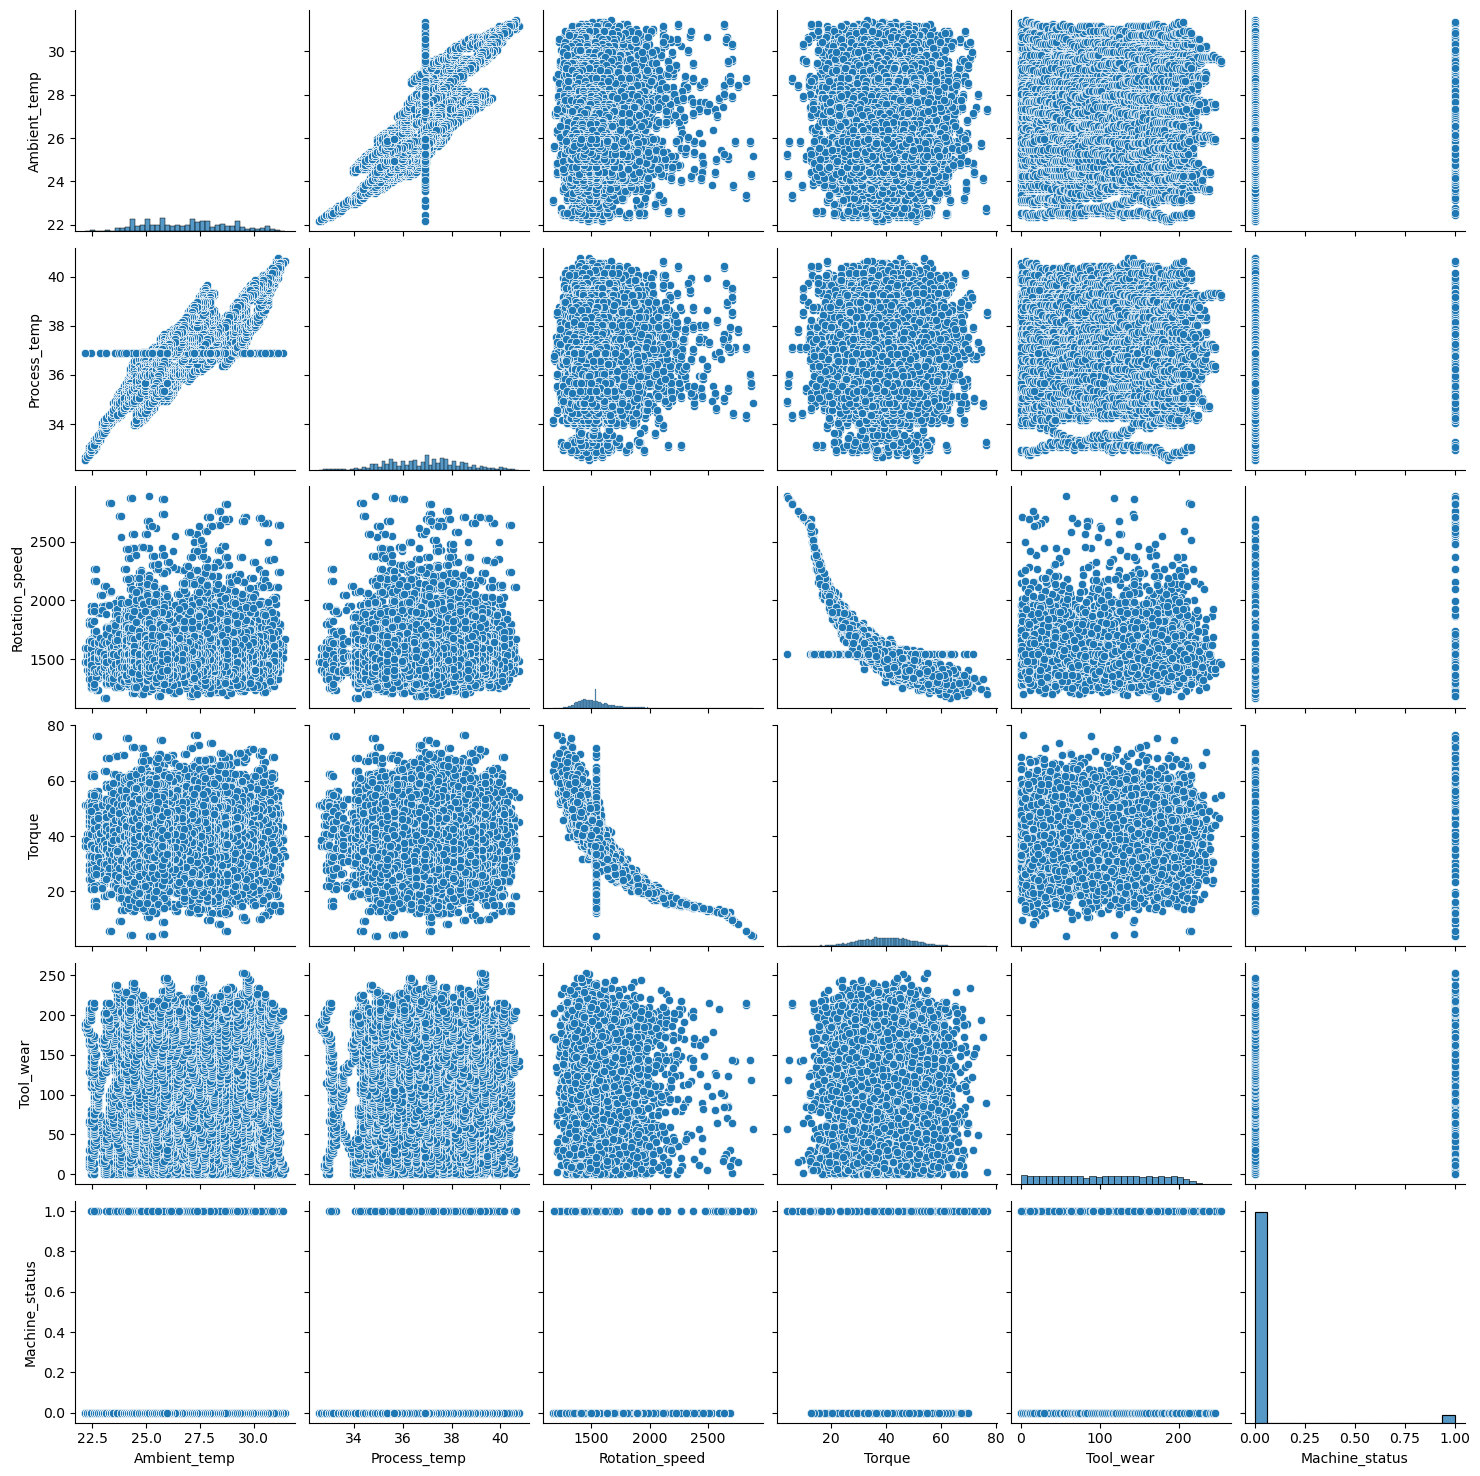

In [30]:
sns.pairplot(machine_data)
plt.show()

#### Pie chart

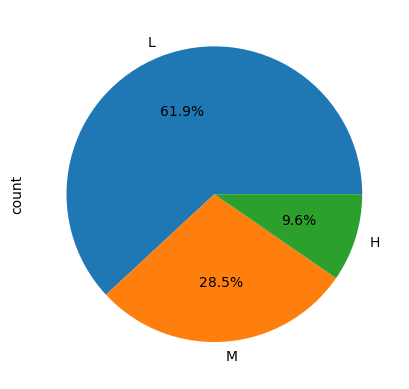

In [31]:
machine_data['Quality'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

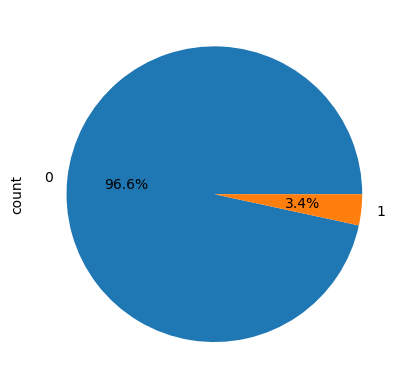

In [32]:
machine_data['Machine_status'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

#### Heatmap

<Axes: >

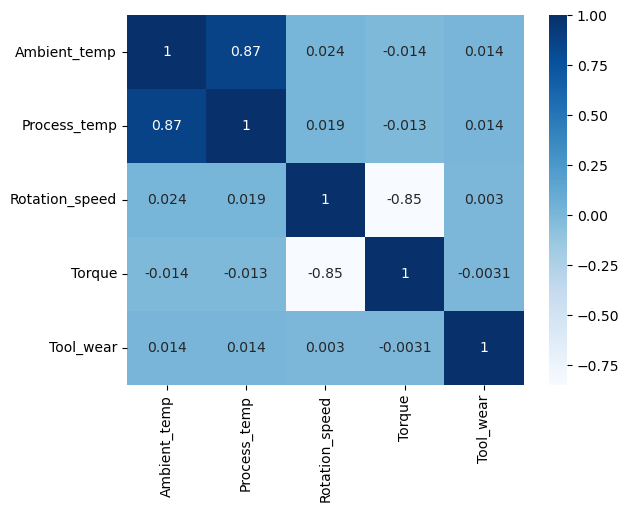

In [33]:
sns.heatmap(corr_data, annot=True, cmap="Blues")

##  Feature Engineering / Data preprocessing 

### Feature Encoding

In [34]:
machine_data['Quality'].value_counts()

Quality
L    12381
M     5696
H     1923
Name: count, dtype: int64

Using one hot encoding to encode the "Quality" column

In [35]:
machine_data1 = pd.get_dummies(machine_data, columns=['Quality'])
machine_data1 = machine_data1.astype(int)
machine_data1

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status,Quality_H,Quality_L,Quality_M
0,24,35,1551,42,0,0,0,0,1
1,25,35,1408,46,3,0,0,1,0
2,24,35,1498,49,5,0,0,1,0
3,25,35,1433,39,7,0,0,1,0
4,25,35,1408,40,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
19995,25,35,1538,29,14,0,0,0,1
19996,25,35,1632,31,17,0,1,0,0
19997,25,36,1538,33,22,0,0,0,1
19998,25,35,1408,48,25,0,1,0,0


### Handling Imbalance

The model is highly imbalanced so randomly sampling the data for further model buildup

In [36]:
machine_data1['Machine_status'].value_counts()

Machine_status
0    19322
1      678
Name: count, dtype: int64

In [37]:
faulty = machine_data1[machine_data1['Machine_status']==1]
faulty

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status,Quality_H,Quality_L,Quality_M
50,25,35,2861,4,143,1,0,1,0
69,25,35,1410,65,191,1,0,1,0
77,25,35,1538,41,208,1,0,1,0
160,25,35,1282,60,216,1,0,1,0
161,25,34,1412,52,218,1,0,1,0
...,...,...,...,...,...,...,...,...,...
19758,25,36,2271,16,218,1,0,1,0
19764,25,36,1294,66,12,1,0,1,0
19822,25,36,1360,60,187,1,0,1,0
19830,25,36,1337,56,206,1,0,1,0


In [38]:
non_faulty = machine_data1[machine_data1['Machine_status']==0].sample(700)
non_faulty

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status,Quality_H,Quality_L,Quality_M
9063,24,35,1419,39,115,0,0,1,0
17005,27,37,1339,52,0,0,0,0,1
10888,22,33,1651,28,110,0,0,0,1
8116,27,38,2004,19,12,0,0,1,0
12288,26,35,1541,39,109,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8820,24,35,1551,40,125,0,0,1,0
3419,28,36,1611,33,144,0,0,1,0
19149,24,35,1429,50,129,0,0,0,1
9910,25,35,1469,46,4,0,0,1,0


In [39]:
machine_data2 = pd.concat([non_faulty, faulty], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
machine_data2

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Machine_status,Quality_H,Quality_L,Quality_M
0,29,39,2024,19,102,0,0,1,0
1,25,35,2861,4,143,1,0,1,0
2,29,37,1349,51,6,1,0,0,1
3,28,37,2691,12,31,1,0,1,0
4,28,37,1393,49,168,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1373,26,35,1538,13,179,1,0,1,0
1374,29,37,1379,49,34,1,0,1,0
1375,27,37,1356,65,66,1,0,1,0
1376,29,36,1538,50,36,1,0,1,0


In [40]:
machine_data2['Machine_status'].value_counts()

Machine_status
0    700
1    678
Name: count, dtype: int64

### Seperating the Target and independent variables 

In [41]:
x = machine_data2.drop('Machine_status',axis=1)
x

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Quality_H,Quality_L,Quality_M
0,29,39,2024,19,102,0,1,0
1,25,35,2861,4,143,0,1,0
2,29,37,1349,51,6,0,0,1
3,28,37,2691,12,31,0,1,0
4,28,37,1393,49,168,0,0,1
...,...,...,...,...,...,...,...,...
1373,26,35,1538,13,179,0,1,0
1374,29,37,1379,49,34,0,1,0
1375,27,37,1356,65,66,0,1,0
1376,29,36,1538,50,36,0,1,0


In [42]:
y = machine_data2['Machine_status']
y

0       0
1       1
2       1
3       1
4       0
       ..
1373    1
1374    1
1375    1
1376    1
1377    1
Name: Machine_status, Length: 1378, dtype: int32

### Splitting Testing and Training Data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape, x_test.shape

((1102, 8), (276, 8))

In [46]:
y_train.value_counts()

Machine_status
1    553
0    549
Name: count, dtype: int64

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
num_col

['Ambient_temp', 'Process_temp', 'Rotation_speed', 'Torque', 'Tool_wear']

In [50]:
x_train[num_col]

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear
1209,27,38,2478,13,170
309,28,37,1557,33,190
490,27,38,1658,30,170
1125,24,35,1325,62,204
535,24,35,1348,58,202
...,...,...,...,...,...
1095,25,37,1584,34,83
1130,29,39,1454,54,253
1294,29,37,1379,49,34
860,27,37,1413,44,72


In [51]:
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_train

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Quality_H,Quality_L,Quality_M
1209,0.068807,1.006542,3.349412,-2.196393,0.652279,0,1,0
309,0.542714,0.313286,0.133717,-0.804064,0.932152,0,1,0
490,0.068807,1.006542,0.486361,-1.012913,0.652279,0,0,1
1125,-1.352914,-1.073225,-0.676317,1.214814,1.128063,0,0,1
535,-1.352914,-1.073225,-0.596012,0.936348,1.100075,0,1,0
...,...,...,...,...,...,...,...,...
1095,-0.879007,0.313286,0.227988,-0.734448,-0.565168,0,1,0
1130,1.016620,1.699797,-0.225910,0.657882,1.813751,0,0,1
1294,1.016620,0.313286,-0.487774,0.309800,-1.250856,0,1,0
860,0.068807,0.313286,-0.369063,-0.038283,-0.719098,0,0,1


In [52]:
x_test[num_col] = scaler.transform(x_test[num_col])
x_test

,Ambient_temp,Process_temp,Rotation_speed,Torque,Tool_wear,Quality_H,Quality_L,Quality_M
597,1.016620,0.313286,-0.110690,-0.316749,-1.054945,0,1,0
700,-0.405100,-0.379970,-0.417944,-0.247132,1.365955,0,0,1
1222,-0.879007,-0.379970,-0.037368,-0.595215,-0.761079,0,1,0
1145,0.068807,1.006542,0.245446,-0.177516,1.086082,0,1,0
602,1.490527,1.699797,3.981379,-2.335626,-1.362805,0,0,1
...,...,...,...,...,...,...,...,...
506,0.542714,0.313286,0.067378,0.936348,-0.187340,0,1,0
615,1.490527,1.006542,3.995345,-2.335626,-0.733092,0,0,1
365,0.542714,-0.379970,-0.547130,0.727498,-0.747085,0,1,0
828,0.542714,0.313286,0.207039,-0.734448,-0.047403,0,1,0


## Model Development

### Importing Models

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [54]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

In [55]:
models = [lr_model,dt_model,rf_model,knn_model,svm_model,nb_model]
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC(),
 GaussianNB()]

### Model Training

In [56]:
for model in models:
    model.fit(x_train,y_train)

### Model Evaluation

#### Classification Report

In [57]:
from sklearn.metrics import classification_report

In [58]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print(" ")

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.79      0.82      0.80       125

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

-------------------------------------------------------
 
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       151
           1       0.90      0.98      0.94       125

    accuracy                           0.95       276
   macro avg       0.95      0.95      0.95       276
weighted avg       0.95      0.95      0.95       276

-------------------------------------------------------
 
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       151
           1       0.91      0.98      0.94       125

 

#### Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

LogisticRegression


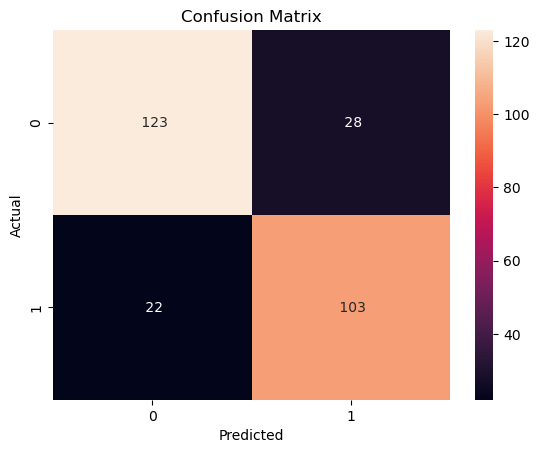

-------------------------------------------------------
 
DecisionTreeClassifier


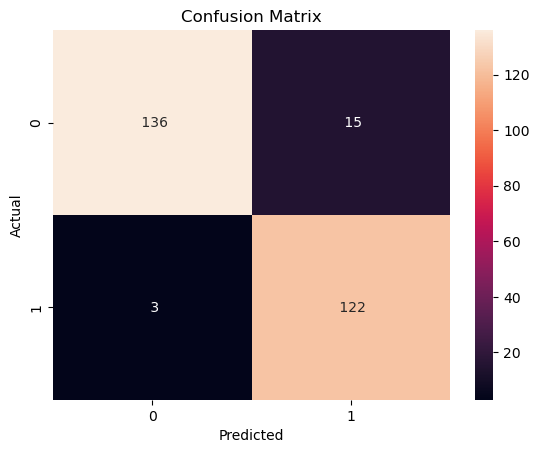

-------------------------------------------------------
 
RandomForestClassifier


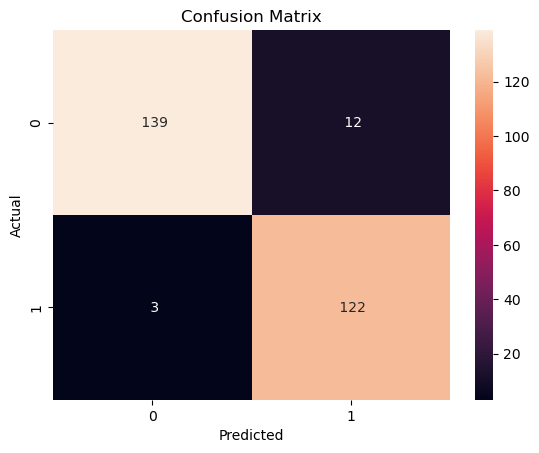

-------------------------------------------------------
 
KNeighborsClassifier


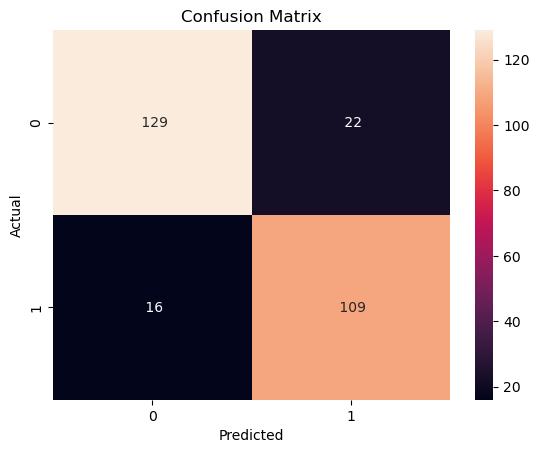

-------------------------------------------------------
 
SVC


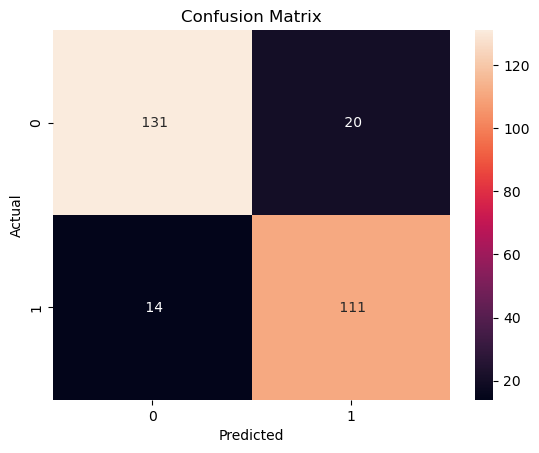

-------------------------------------------------------
 
GaussianNB


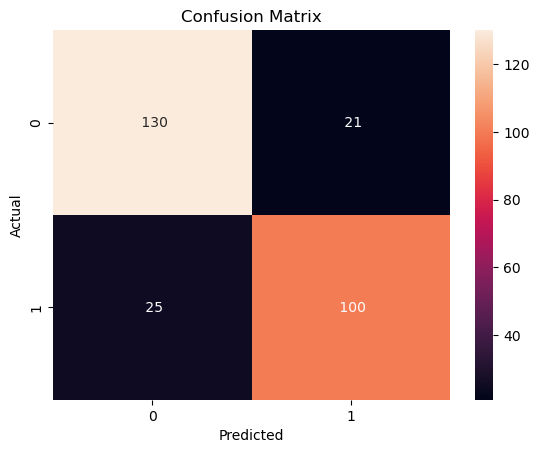

-------------------------------------------------------
 


In [60]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt= " ")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-------------------------------------------------------")
    print(" ")

### Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
%%time
for model in models:
    acc_ls =  cross_val_score(model,x,y, scoring='accuracy', cv=5)
    mean_acc = round(acc_ls.mean()*100,2)
    modelname = model.__class__.__name__
    print(f"{modelname}'s Cross Validation Accuracy is = {mean_acc}%")
    print("-------------------------------------------------------")

LogisticRegression's Cross Validation Accuracy is = 79.32%
-------------------------------------------------------
DecisionTreeClassifier's Cross Validation Accuracy is = 92.6%
-------------------------------------------------------
RandomForestClassifier's Cross Validation Accuracy is = 94.12%
-------------------------------------------------------
KNeighborsClassifier's Cross Validation Accuracy is = 85.49%
-------------------------------------------------------
SVC's Cross Validation Accuracy is = 78.81%
-------------------------------------------------------
GaussianNB's Cross Validation Accuracy is = 81.86%
-------------------------------------------------------
CPU times: total: 5.64 s
Wall time: 4.74 s


### Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

In [65]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [66]:
%%time
grid_search.fit(x_train, y_train)

CPU times: total: 1min 6s
Wall time: 1min 8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [67]:
# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 100}


In [68]:
best_estimator = grid_search.best_estimator_
best_estimator.fit(x_train,y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       151
           1       0.91      0.96      0.93       125

    accuracy                           0.94       276
   macro avg       0.94      0.94      0.94       276
weighted avg       0.94      0.94      0.94       276



### Creating Pickle File

In [74]:
import pickle
with open('best_estimator.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

In [75]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Customizing predictions

In [125]:
def predict_machine_status(model, scaler, num_col):
    Qual = input("Enter a value for 'Qual' (M, L, H): ").strip().upper()
    
    while Qual not in ['M', 'L', 'H']:
        print("Invalid input. Please enter 'M', 'L', or 'H'.")
        Qual = input("Enter a value for 'Qual' (M, L, H): ").strip().upper()

    ambient_t = float(input("Enter Ambient Temperature = "))
    process_t = float(input("Enter Process Temperature = "))
    rot_speed = float(input("Enter Rotation Speed = "))
    torq = float(input("Enter Torque = "))
    Tool_w = float(input("Enter Tool wear = "))

    input_data = {
        "Quality": [Qual],
        "Ambient_temp": [ambient_t],
        "Process_temp": [process_t],
        "Rotation_speed": [rot_speed],
        "Torque": [torq],
        "Tool_wear": [Tool_w]
    }
    
    input_df = pd.DataFrame(input_data)
    input_df_encoded = pd.get_dummies(input_df, columns=['Quality'])
    input_df_encoded[num_col] = scaler.transform(input_df_encoded[num_col])
    
    for col in ['Quality_L', 'Quality_M', 'Quality_H']:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0
    
    input_for_prediction = input_df_encoded.values.reshape(1, -1)
    prediction = model.predict(input_for_prediction)
    
    if prediction[0] == 1:
        return "Machine is faulty"
    else:
        return "Machine is not faulty"

#### Test Case - 1 

In [127]:
result = predict_machine_status(best_estimator, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter a value for 'Qual' (M, L, H):  l
Enter Ambient Temperature =  29.55
Enter Process Temperature =  37.55
Enter Rotation Speed =  1263
Enter Torque =  67
Enter Tool wear =  197


-------------------------------------- 
Machine is faulty


#### Test Case - 2

In [129]:
result = predict_machine_status(best_estimator, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter a value for 'Qual' (M, L, H):  m
Enter Ambient Temperature =  23.75
Enter Process Temperature =  25
Enter Rotation Speed =  1450
Enter Torque =  46.9
Enter Tool wear =  186


-------------------------------------- 
Machine is not faulty


#### Test Case - 3 

In [131]:
result = predict_machine_status(best_estimator, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter a value for 'Qual' (M, L, H):  m
Enter Ambient Temperature =  29.35
Enter Process Temperature =  37.45
Enter Rotation Speed =  1372
Enter Torque =  45.7
Enter Tool wear =  144


-------------------------------------- 
Machine is faulty


#### Test Case - 4 

In [133]:
result = predict_machine_status(best_estimator, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter a value for 'Qual' (M, L, H):  h
Enter Ambient Temperature =  27.15
Enter Process Temperature =  38.75
Enter Rotation Speed =  1390
Enter Torque =  49
Enter Tool wear =  194


-------------------------------------- 
Machine is not faulty


#### Test Case - 5 

In [135]:
result = predict_machine_status(best_estimator, scaler, num_col)
print("-------------------------------------- ")
print(result)

Enter a value for 'Qual' (M, L, H):  l
Enter Ambient Temperature =  22.75
Enter Process Temperature =  33.45
Enter Rotation Speed =  1414
Enter Torque =  50.2
Enter Tool wear =  51


-------------------------------------- 
Machine is not faulty


# Conclusion

In this project, I explored various classification models to predict machine failures and selected the Random Forest classifier for its strong performance. After fine-tuning the model through cross-validation and hyperparameter tuning, I developed a customized prediction function that allows users to input specific values and get real-time predictions.

This solution helps in planning maintenance in advance, reducing downtime, cutting costs, and improving machine efficiency.

# Future Scope

1. Exploring different techniques for handling imbalanced data, such as SMOTE or cost-sensitive learning.
2. Investigating additional hyperparameter tuning options to ensure the model is neither overfitted nor underfitted while maintaining high accuracy.
3. Exploring advanced algorithms like deep learning for improved performance and handling complex data patterns.

# Challenges Faced During the Project

1. Managing class imbalance in failure records for better model training.
2. Selecting the best classification model and optimizing it through tuning.
3. Creating a user-friendly prediction function for customized input scenarios.